In [3]:
import sounddevice as sd
import wavio

# Step 1: Define parameters
duration = 5  # Duration of the recording in seconds
sample_rate = 44100  # Sample rate in Hz (44.1 kHz)

# Step 2: Record the audio
print("Recording...")
voice_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()  # Wait until recording is finished
print("Recording finished.")

# Step 3: Save the audio as a .wav file
output_file = "recorded_voices.wav"
wavio.write(output_file, voice_signal, sample_rate, sampwidth=2)  # Save as 16-bit PCM WAV
print(f"Audio saved as {output_file}")


Recording...
Recording finished.
Audio saved as recorded_voices.wav


In [4]:
# Step 4: Play the recorded audio
print("Playing the recorded audio...")
sd.play(voice_signal, sample_rate)
sd.wait()  # Wait until playback is finished


Playing the recorded audio...


<sounddevice.CallbackFlags: output underflow>

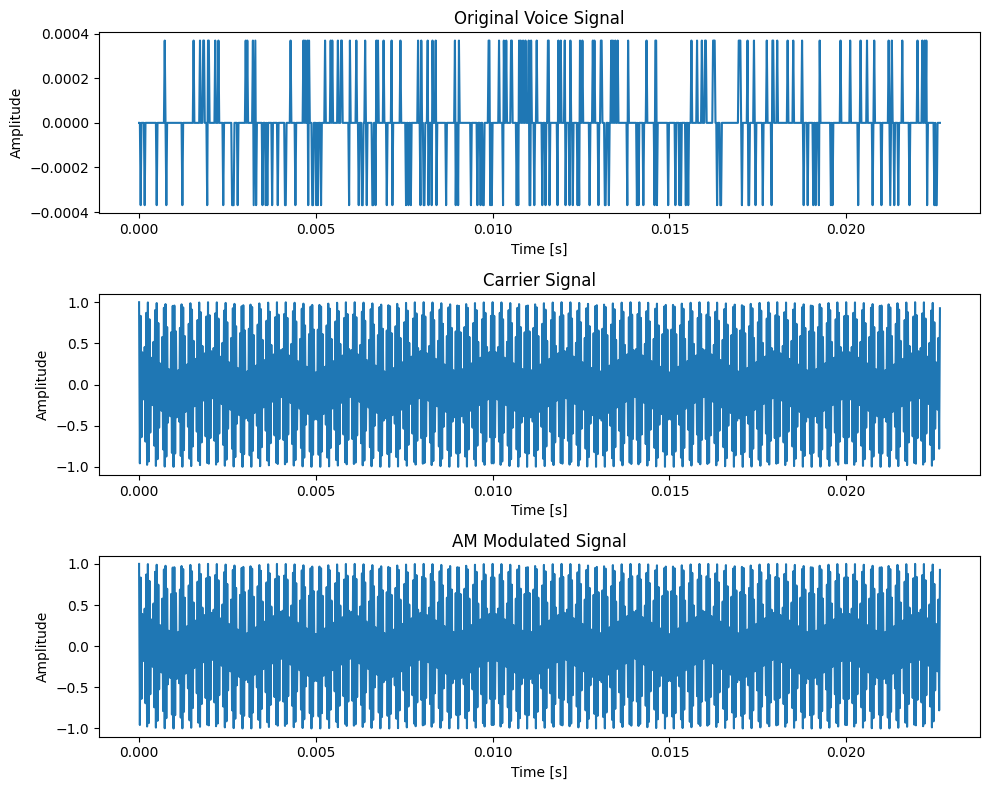

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Step 1: Load the voice signal
sampling_rate, voice_signal = wavfile.read("recorded_voices.wav")  # Your voice file here
voice_signal = voice_signal / np.max(np.abs(voice_signal))  # Normalize the signal

# Step 2: Define parameters for AM modulation
carrier_freq = 20000  # Carrier frequency in Hz
time = np.arange(len(voice_signal)) / sampling_rate  # Time axis for the voice signal

# Step 3: Generate the carrier signal (cosine wave)
carrier_signal = np.cos(2 * np.pi * carrier_freq * time)

# Step 4: Apply Amplitude Modulation (AM)
modulation_index = 0.5  # Controls depth of modulation (0 to 1)
modulated_signal = (1 + modulation_index * voice_signal) * carrier_signal

# Step 5: Plotting waveforms
plt.figure(figsize=(10, 8))

# Plot original voice signal
plt.subplot(3, 1, 1)
plt.plot(time[:1000], voice_signal[:1000])
plt.title('Original Voice Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot carrier signal
plt.subplot(3, 1, 2)
plt.plot(time[:1000], carrier_signal[:1000])
plt.title('Carrier Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot modulated signal
plt.subplot(3, 1, 3)
plt.plot(time[:1000], modulated_signal[:1000])
plt.title('AM Modulated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Optional: Save the modulated signal to a new WAV file
modulated_signal_normalized = np.int16(modulated_signal / np.max(np.abs(modulated_signal)) * 32767)
wavfile.write("modulated_voice_am.wav", sampling_rate, modulated_signal_normalized)


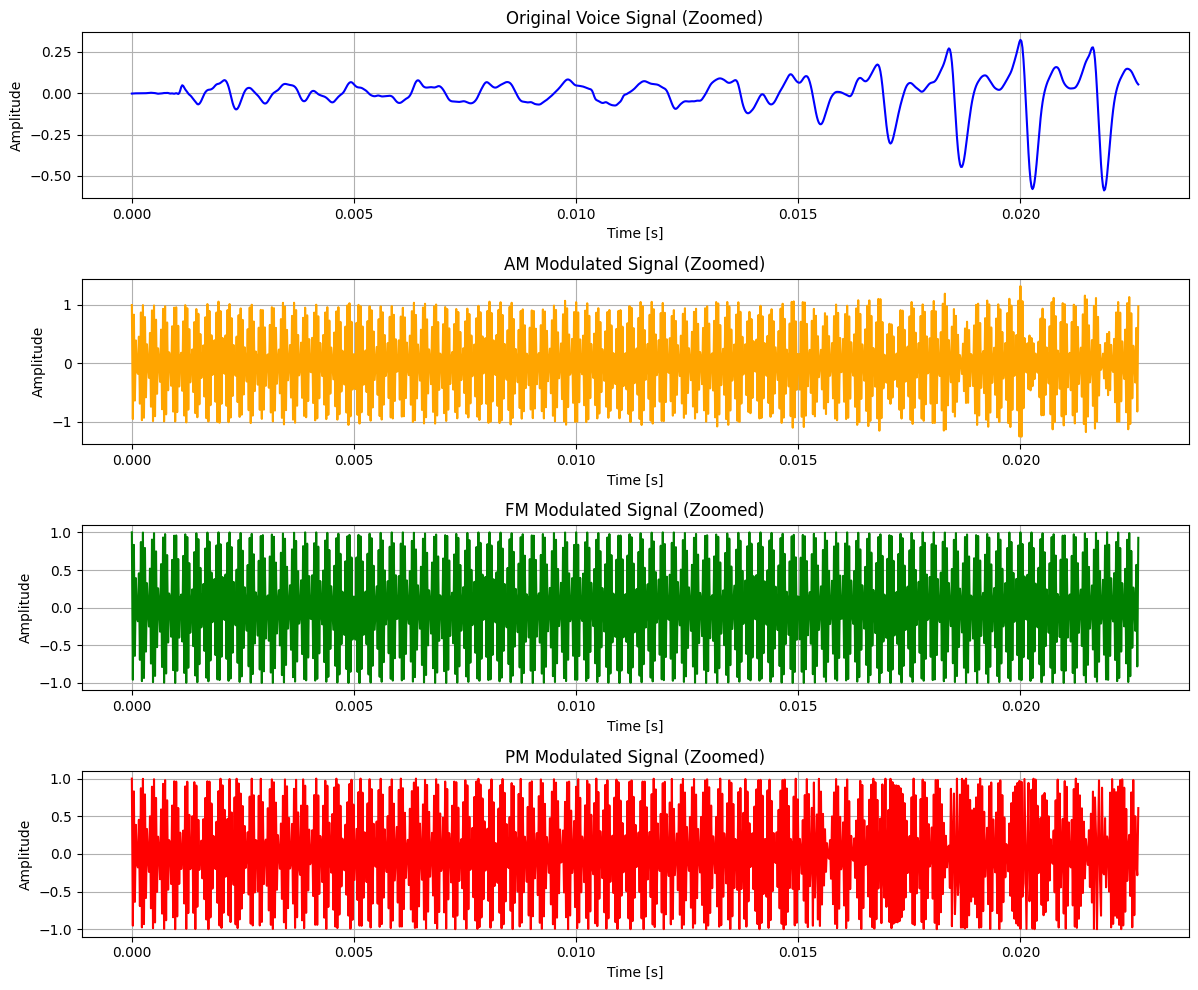

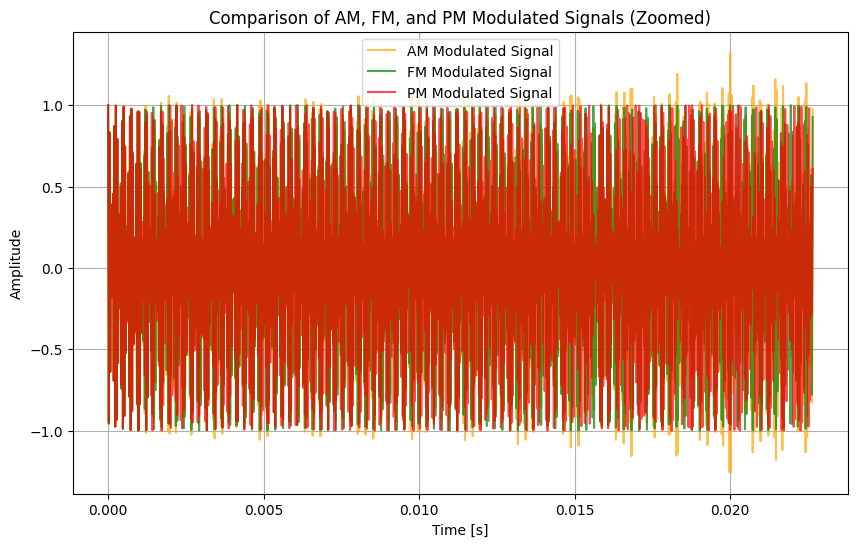

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Step 1: Load the sample audio file from librosa
file_path = librosa.example('trumpet')  # You can replace this with a file path
voice_signal, sampling_rate = librosa.load(file_path, sr=44100)

# Normalize the voice signal
voice_signal = voice_signal / np.max(np.abs(voice_signal))

# Define time axis (smaller sample range for zoomed view)
sample_range = 1000  # Show only the first 1000 samples for clarity
time = np.arange(sample_range) / sampling_rate

# Step 2: Define modulation parameters
carrier_freq = 20000
modulation_index_am = 1  # Increased modulation index for AM
modulation_index_fm = 300  # Increased modulation index for FM
modulation_index_pm = 10  # Increased modulation index for PM

# Step 3: Apply AM modulation (Amplitude Modulation)
carrier_signal = np.cos(2 * np.pi * carrier_freq * time)
am_modulated_signal = (1 + modulation_index_am * voice_signal[:sample_range]) * carrier_signal

# Step 4: Apply FM modulation (Frequency Modulation)
integral_of_voice = np.cumsum(voice_signal[:sample_range]) / sampling_rate
fm_modulated_signal = np.cos(2 * np.pi * carrier_freq * time + modulation_index_fm * integral_of_voice)

# Step 5: Apply PM modulation (Phase Modulation)
pm_modulated_signal = np.cos(2 * np.pi * carrier_freq * time + modulation_index_pm * voice_signal[:sample_range])

# Step 6: Plot the original voice signal and modulated signals
plt.figure(figsize=(12, 10))

# Plot original voice signal (zoomed in)
plt.subplot(4, 1, 1)
plt.plot(time, voice_signal[:sample_range], label='Original Voice Signal', color='blue')
plt.title('Original Voice Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot AM modulated signal (zoomed in)
plt.subplot(4, 1, 2)
plt.plot(time, am_modulated_signal, label='AM Modulated Signal', color='orange')
plt.title('AM Modulated Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot FM modulated signal (zoomed in)
plt.subplot(4, 1, 3)
plt.plot(time, fm_modulated_signal, label='FM Modulated Signal', color='green')
plt.title('FM Modulated Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot PM modulated signal (zoomed in)
plt.subplot(4, 1, 4)
plt.plot(time, pm_modulated_signal, label='PM Modulated Signal', color='red')
plt.title('PM Modulated Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 7: Plot overlapping modulated signals (Zoomed)
plt.figure(figsize=(10, 6))

# Plot AM, FM, and PM modulated signals in different colors (zoomed)
plt.plot(time, am_modulated_signal, label='AM Modulated Signal', color='orange', alpha=0.7)
plt.plot(time, fm_modulated_signal, label='FM Modulated Signal', color='green', alpha=0.7)
plt.plot(time, pm_modulated_signal, label='PM Modulated Signal', color='red', alpha=0.7)

plt.title('Comparison of AM, FM, and PM Modulated Signals (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


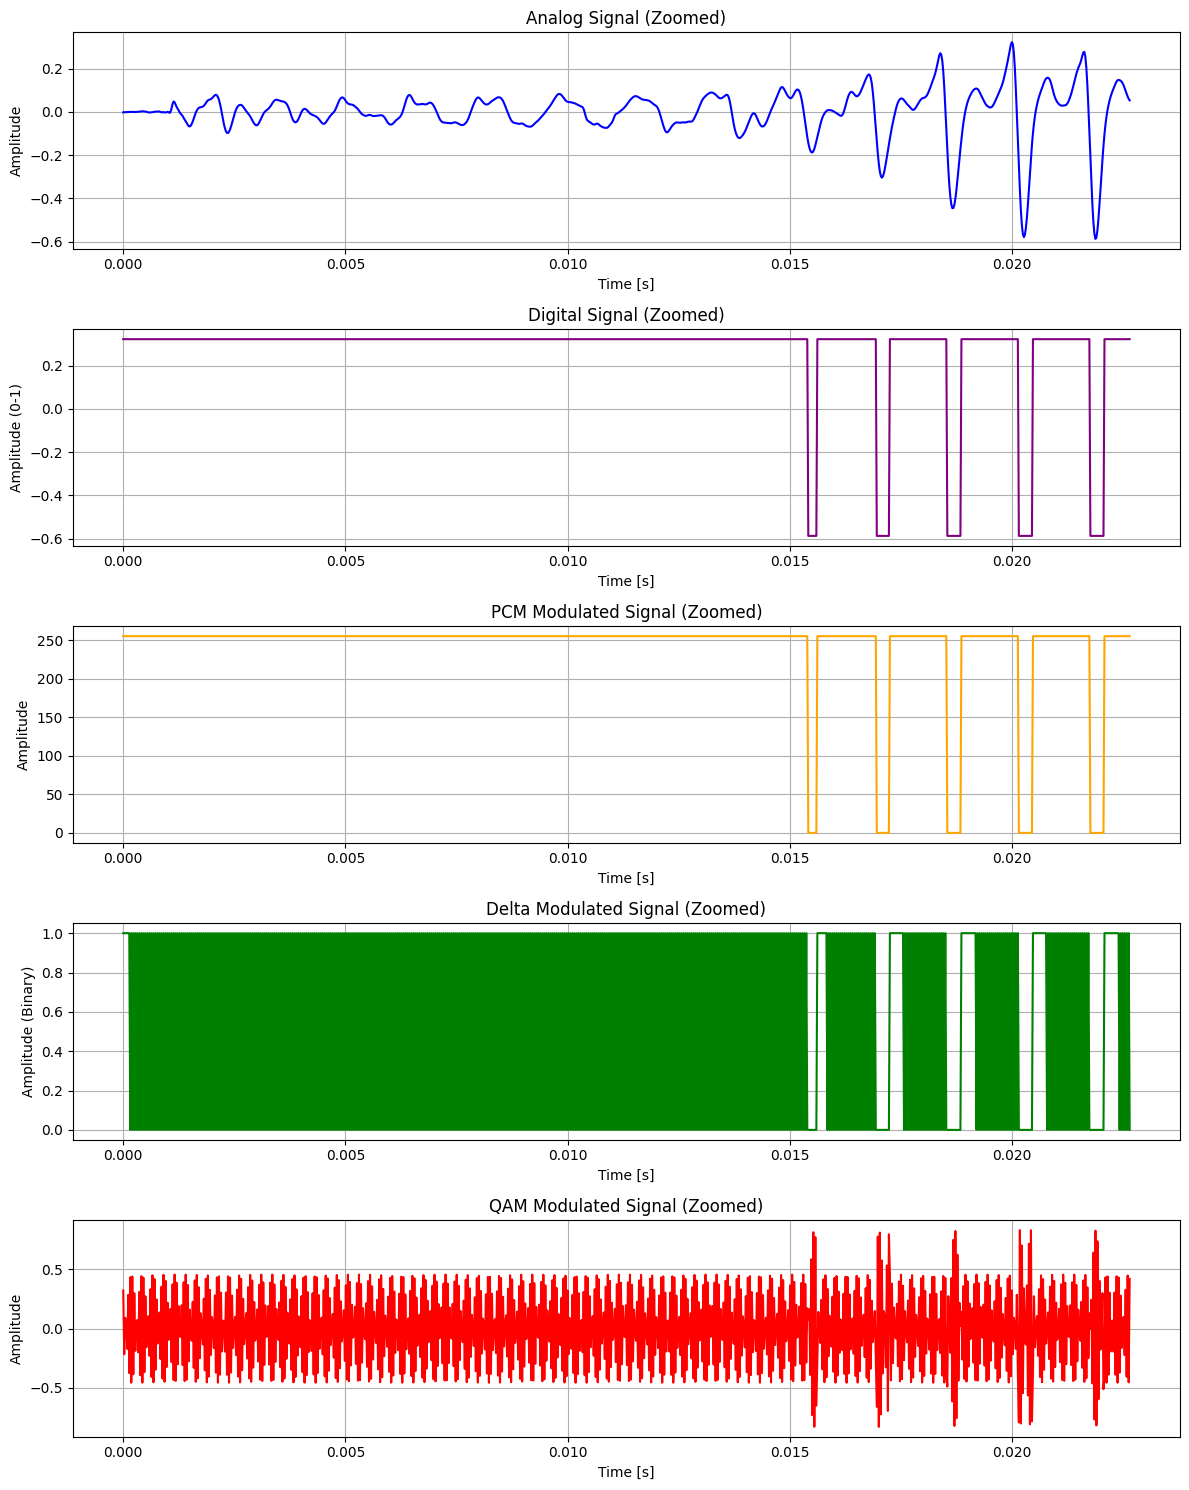

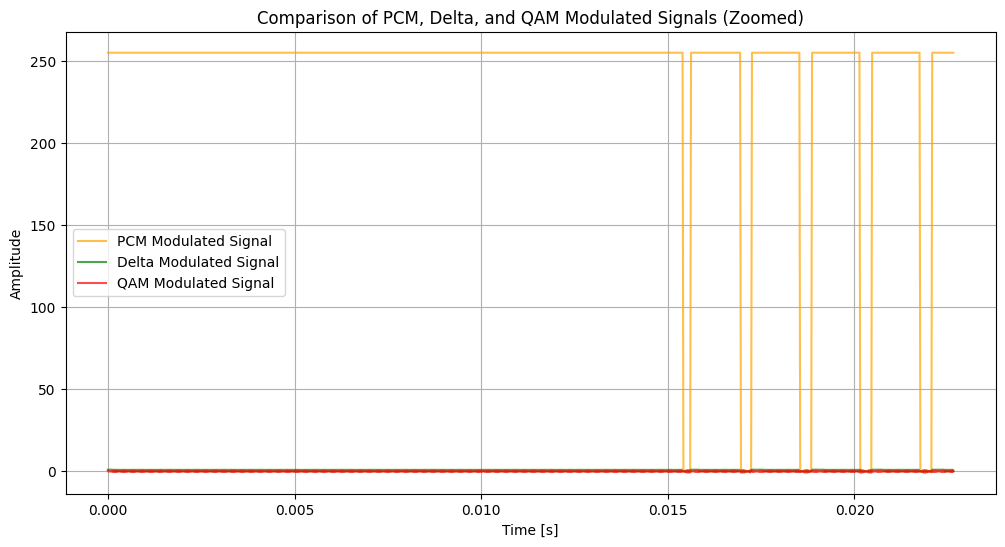

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the analog signal (example trumpet sound)
file_path = librosa.example('trumpet')
analog_signal, sampling_rate = librosa.load(file_path, sr=44100)

# Normalize the analog signal
analog_signal = analog_signal / np.max(np.abs(analog_signal))

# Define the sample range for a zoomed-in view
sample_range = 1000
time = np.arange(sample_range) / sampling_rate

# Step 2: Convert the analog signal into a digital signal (0-1 quantization)
def quantize_to_digital(signal, levels=2):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    step_size = (signal_max - signal_min) / (levels - 1)
    digital_signal = np.round((signal - signal_min) / step_size) * step_size + signal_min
    return digital_signal

digital_signal = quantize_to_digital(analog_signal[:sample_range])

# Step 3: Corrected Pulse Code Modulation (PCM)
def pulse_code_modulation(signal, num_bits=8):
    # Convert signal to a discrete set of values based on the number of bits (e.g., 8-bit PCM)
    levels = 2**num_bits  # Number of quantization levels
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    
    # Normalize the signal between 0 and 1
    normalized_signal = (signal - signal_min) / (signal_max - signal_min)
    
    # Quantize to integer levels between 0 and (2^num_bits - 1)
    pcm_signal = np.round(normalized_signal * (levels - 1))
    
    return pcm_signal

pcm_signal = pulse_code_modulation(digital_signal)

# Step 4: Apply Delta Modulation (DM)
def delta_modulation(signal):
    dm_signal = np.zeros(len(signal))
    previous_sample = 0
    delta = 0.05  # Delta step size
    for i in range(len(signal)):
        if signal[i] > previous_sample:
            dm_signal[i] = 1
            previous_sample += delta
        else:
            dm_signal[i] = 0
            previous_sample -= delta
    return dm_signal

dm_signal = delta_modulation(digital_signal)

# Step 5: Apply Quadrature Amplitude Modulation (QAM)
def quadrature_amplitude_modulation(signal):
    # Simple QAM: modulating signal on cosine and sine carrier waves
    carrier_freq = 20000
    carrier_cos = np.cos(2 * np.pi * carrier_freq * time)
    carrier_sin = np.sin(2 * np.pi * carrier_freq * time)
    qam_signal = signal * carrier_cos + signal * carrier_sin
    return qam_signal

qam_signal = quadrature_amplitude_modulation(digital_signal)

# Step 6: Plot all signals

plt.figure(figsize=(12, 15))

# Plot analog signal
plt.subplot(5, 1, 1)
plt.plot(time, analog_signal[:sample_range], label='Analog Signal', color='blue')
plt.title('Analog Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot digital signal (binary)
plt.subplot(5, 1, 2)
plt.plot(time, digital_signal, label='Digital Signal (0-1)', color='purple')
plt.title('Digital Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude (0-1)')
plt.grid(True)

# Plot PCM modulated signal
plt.subplot(5, 1, 3)
plt.plot(time, pcm_signal, label='PCM Modulated Signal', color='orange')
plt.title('PCM Modulated Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot Delta Modulated signal
plt.subplot(5, 1, 4)
plt.plot(time, dm_signal, label='Delta Modulated Signal', color='green')
plt.title('Delta Modulated Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude (Binary)')
plt.grid(True)

# Plot QAM modulated signal
plt.subplot(5, 1, 5)
plt.plot(time, qam_signal, label='QAM Modulated Signal', color='red')
plt.title('QAM Modulated Signal (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 7: Overlapping comparison of the 3 modulated signals
plt.figure(figsize=(12, 6))
plt.plot(time, pcm_signal, label='PCM Modulated Signal', color='orange', alpha=0.7)
plt.plot(time, dm_signal, label='Delta Modulated Signal', color='green', alpha=0.7)
plt.plot(time, qam_signal, label='QAM Modulated Signal', color='red', alpha=0.7)

plt.title('Comparison of PCM, Delta, and QAM Modulated Signals (Zoomed)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
